# EDA with TIME SERIES DATA

In [ ]:
# Source : https://www.youtube.com/watch?v=W-YCKMNTcqE
# Kaggle : https://www.kaggle.com/satishgunjal/tutorial-time-series-analysis-and-forecasting
# machine Learning plus : https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# Tensor flow : https://www.tensorflow.org/tutorials/structured_data/time_series


In [ ]:
#install pandas data reader
!pip install pandas-datareader

In [67]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [94]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [95]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [11]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,45107400.0,800.770020
2022-02-25,819.500000,782.400024,809.229980,809.869995,25309500.0,809.869995


<AxesSubplot:xlabel='Date'>

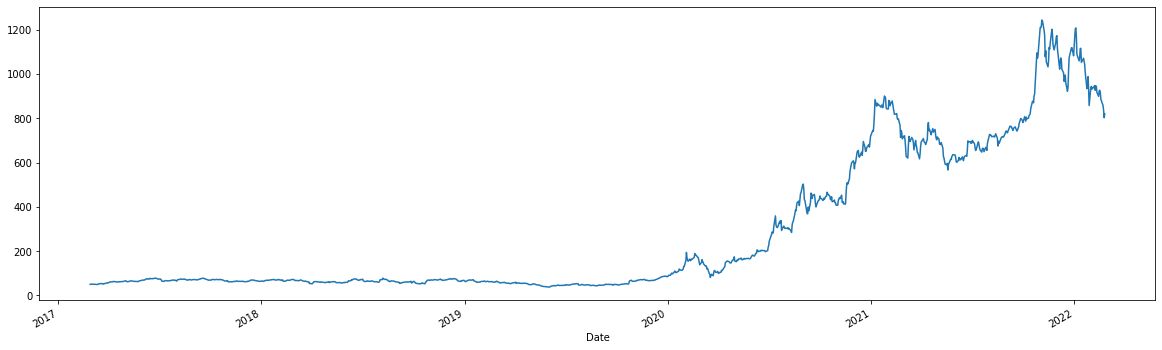

In [16]:
df_tesla['High'].plot(figsize = (20,6))

<AxesSubplot:xlabel='Date'>

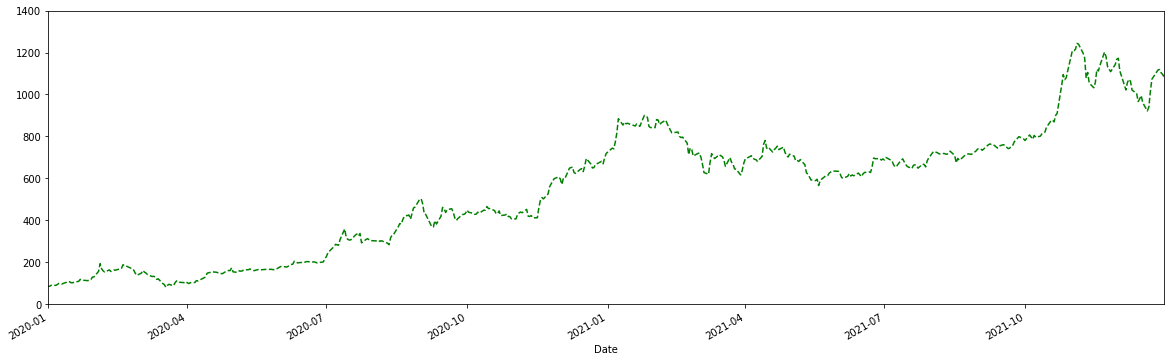

In [27]:
# xlimit and ylimit and color and linestyle
df_tesla['High'].plot(figsize = (20,6), xlim = (datetime(2020,1,1), datetime(2021,12,31)), ylim = (0,1400) , color = 'green', ls = '--')

In [29]:
df_tesla.iloc[:3]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002


In [30]:
# get data of open from last year
df_tesla.loc['2020-01-01':'2020-12-31']['Open']

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2020-12-24    642.989990
2020-12-28    674.510010
2020-12-29    661.000000
2020-12-30    672.000000
2020-12-31    699.989990
Name: Open, Length: 253, dtype: float64

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

KeyError: 0

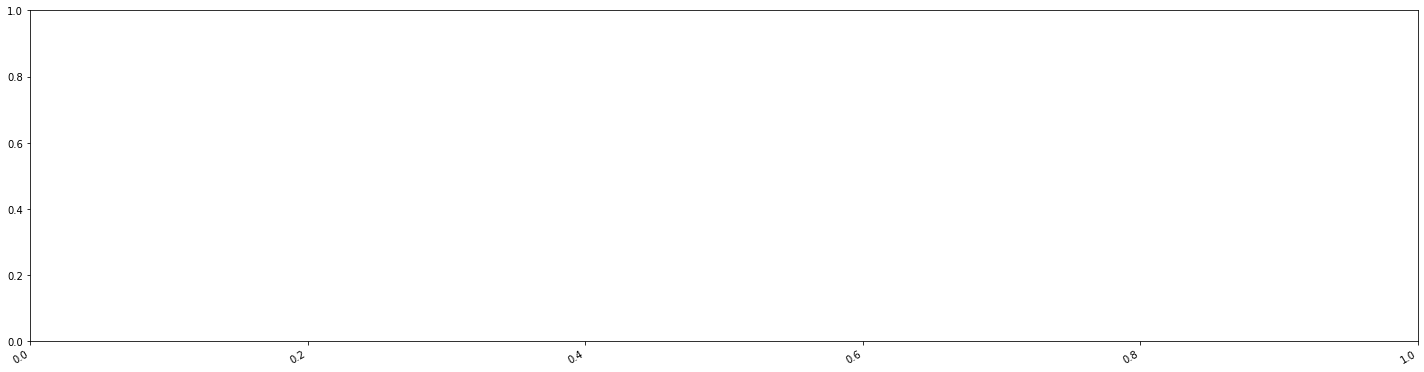

In [40]:
figure,axis = plt.subplots(figsize = (20,6))
plt.tight_layout()
#preventing overlapping x axis(date)
figure.autofmt_xdate()
axis.plot(df_tesla,share_open)

In [51]:
# reset index
df_tesla.reset_index(inplace = True)
df_tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
1,2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2,2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
3,2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
4,2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [45]:
del df_tesla['index']

In [52]:
df_tesla.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [53]:
# set index to date
df_tesla.set_index('Date', inplace = True)


In [70]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [71]:
# create dataframe with close
df_tesla = df_tesla['Close'].to_frame()
df_tesla

,Close
Date,
2017-02-27,49.245998
2017-02-28,49.998001
2017-03-01,50.004002
2017-03-02,50.096001
2017-03-03,50.313999
...,...
2022-02-18,856.979980
2022-02-22,821.530029
2022-02-23,764.039978


In [72]:
# calculate EMA withth window size 30
df_tesla['EMA_30'] = df_tesla['Close'].ewm(span = 30).mean()
df_tesla

,Close,EMA_30
Date,,
2017-02-27,49.245998,49.245998
2017-02-28,49.998001,49.634533
2017-03-01,50.004002,49.765988
2017-03-02,50.096001,49.856918
2017-03-03,50.313999,49.960915
...,...,...
2022-02-18,856.979980,935.627635
2022-02-22,821.530029,928.266499
2022-02-23,764.039978,917.671239


<AxesSubplot:xlabel='Date'>

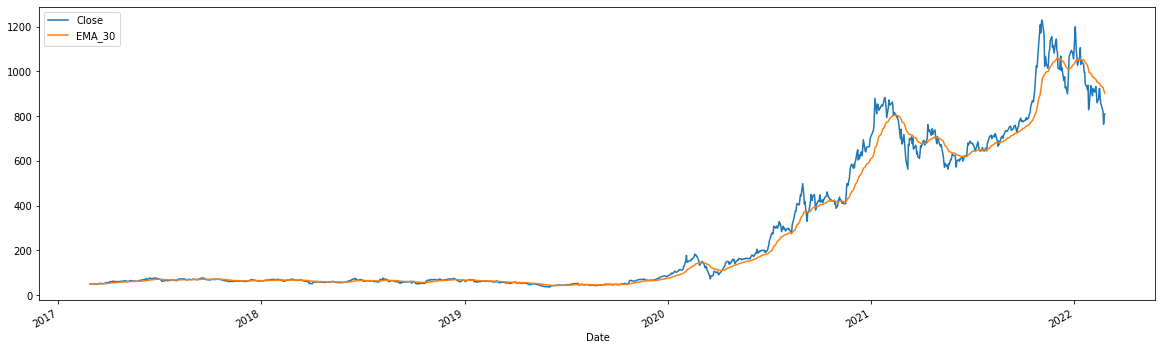

In [73]:
# plot clos and EMA
df_tesla[['Close','EMA_30']].plot(figsize = (20,6))

In [74]:
# calculate SMA with window size 30
df_tesla['SMA_30'] = df_tesla['Close'].rolling(window = 30).mean()
df_tesla


,Close,EMA_30,SMA_30
Date,,,
2017-02-27,49.245998,49.245998,NaN
2017-02-28,49.998001,49.634533,NaN
2017-03-01,50.004002,49.765988,NaN
2017-03-02,50.096001,49.856918,NaN
2017-03-03,50.313999,49.960915,NaN
...,...,...,...
2022-02-18,856.979980,935.627635,944.444999
2022-02-22,821.530029,928.266499,937.597335
2022-02-23,764.039978,917.671239,927.794668


<AxesSubplot:xlabel='Date'>

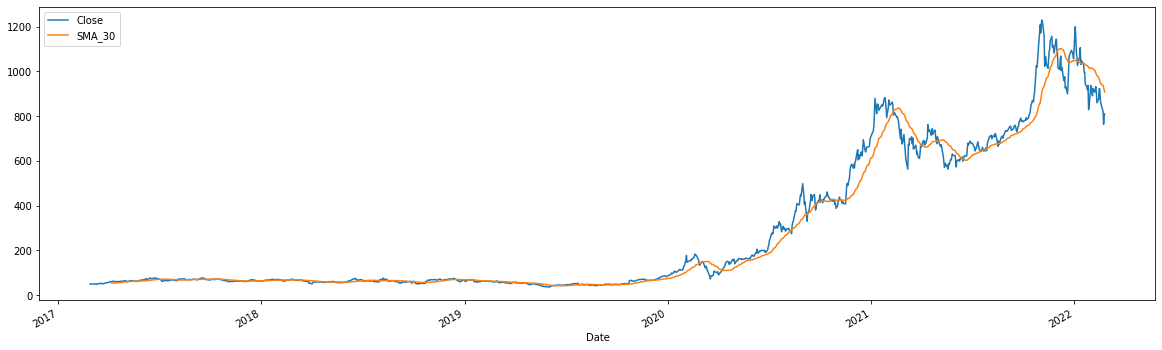

In [75]:
# plot close and SMA
df_tesla[['Close','SMA_30']].plot(figsize = (20,6))

In [76]:
# calculate CMA with window size 30
df_tesla['CMA_30'] = df_tesla['Close'].expanding().mean()
df_tesla

,Close,EMA_30,SMA_30,CMA_30
Date,,,,
2017-02-27,49.245998,49.245998,NaN,49.245998
2017-02-28,49.998001,49.634533,NaN,49.622000
2017-03-01,50.004002,49.765988,NaN,49.749334
2017-03-02,50.096001,49.856918,NaN,49.836000
2017-03-03,50.313999,49.960915,NaN,49.931600
...,...,...,...,...
2022-02-18,856.979980,935.627635,944.444999,275.793651
2022-02-22,821.530029,928.266499,937.597335,276.227809
2022-02-23,764.039978,917.671239,927.794668,276.615577


<AxesSubplot:xlabel='Date'>

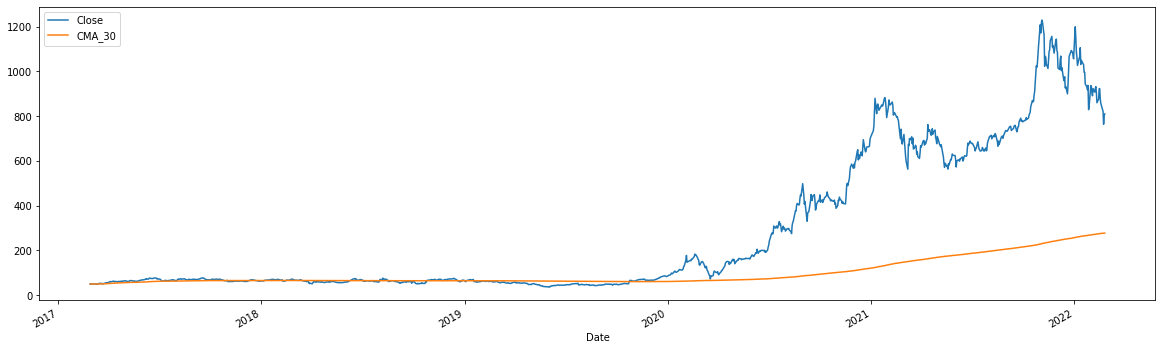

In [77]:
# plot close and CMA
df_tesla[['Close','CMA_30']].plot(figsize = (20,6))

In [78]:
# datetime

from datetime import datetime

In [88]:
datetime.now()

datetime.datetime(2022, 2, 27, 13, 46, 44, 330843)

In [89]:
date = datetime.now()

In [92]:
print(date.day)
print(date.month)
print(date.year)
print(date.hour)
print(date.minute)
print(date.second)
print(date.microsecond)

27
2
2022
13
46
47
838089


## Time Resampling
https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [96]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [97]:
## year end frequency 
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


<AxesSubplot:xlabel='Date'>

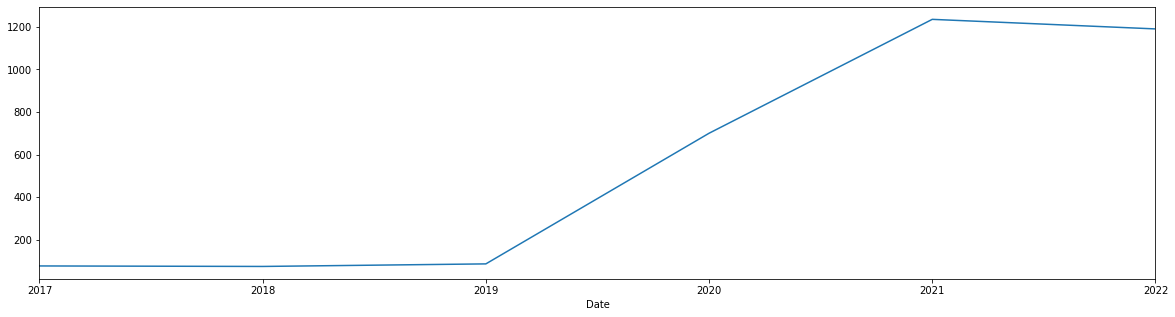

In [100]:
df_tesla.resample(rule='A').max()['Open'].plot(figsize = (20,5))

<AxesSubplot:xlabel='Date'>

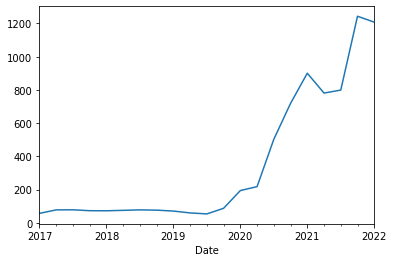

In [102]:
# resample with rule QS
df_tesla.resample(rule='QS').max()['High'].plot()

In [103]:
# bussiness end frequency
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [104]:
df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,56.400002,55.442001,55.745998,55.660000,57304000.0,55.660000
2017-04-03,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


In [112]:
## rolling # expanding

df_tesla['High'].rolling(window = 5).mean().to_frame()

,High
Date,
2017-02-27,NaN
2017-02-28,NaN
2017-03-01,NaN
2017-03-02,NaN
2017-03-03,50.375600
...,...
2022-02-18,910.735999
2022-02-22,902.305994
2022-02-23,884.765991


In [120]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window = 10).mean()

In [121]:
df_tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998,NaN
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,NaN
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,NaN
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,NaN
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,NaN
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN


<AxesSubplot:xlabel='Date'>

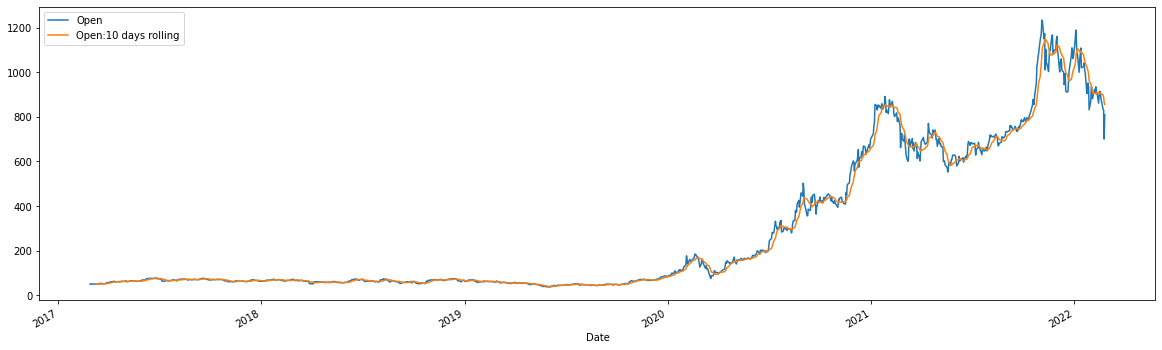

In [122]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize = (20,6))

# Simple Moving Average

<AxesSubplot:xlabel='Date'>

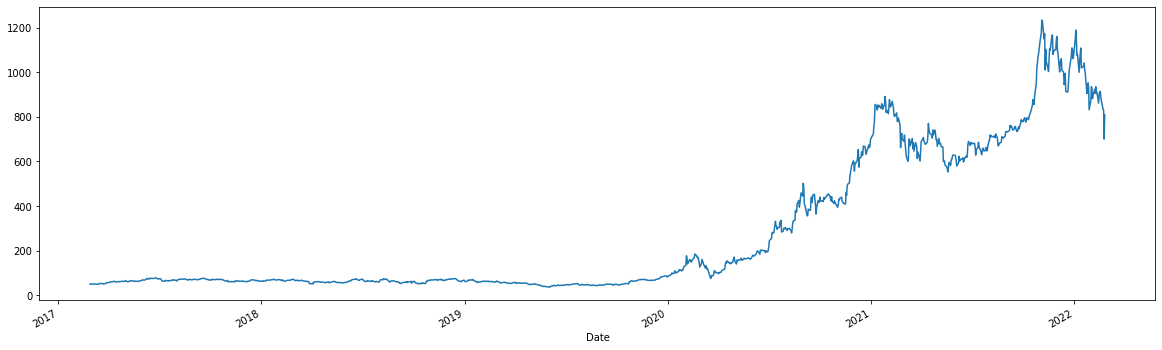

In [123]:
df_tesla['Open'].plot(figsize = (20,6))

In [126]:
df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window = 10,).mean()

<AxesSubplot:xlabel='Date'>

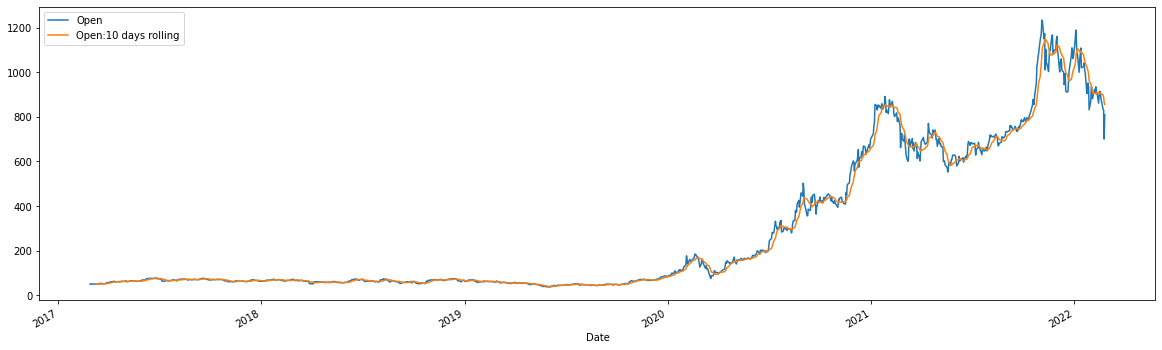

In [128]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize = (20,6))

<AxesSubplot:xlabel='Date'>

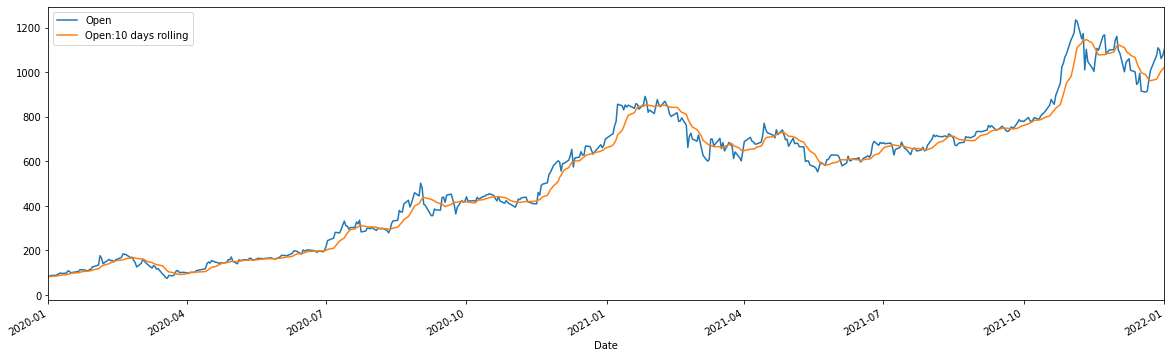

In [131]:
df_tesla[['Open','Open:10 days rolling']].plot(xlim =['2020','2022'],figsize = (20,6))

In [ ]:
# Commulative Moving Average

<AxesSubplot:xlabel='Date'>

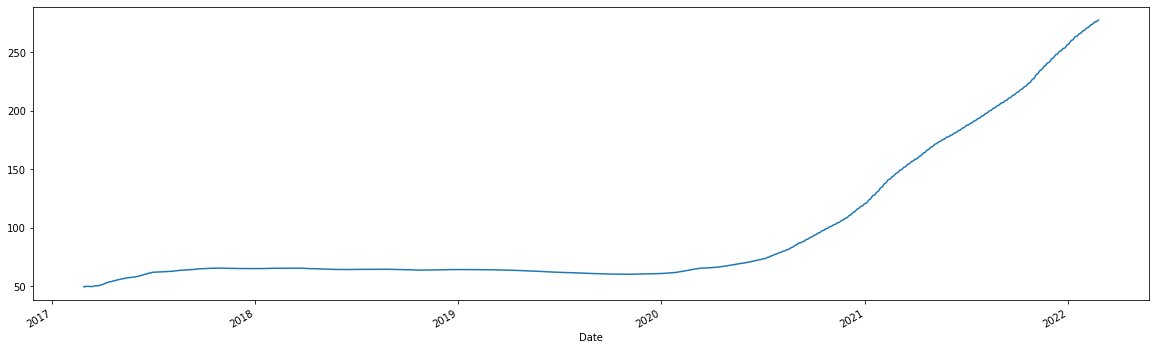

In [132]:
## Expanding
df_tesla['Open'].expanding().mean().plot(figsize = (20,6))

In [ ]:
## Exponential Moving Average

In [ ]:
# Exponential Weighted Moving Average

In [ ]:
# ACF and PACF